In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import re

## Importing Libraries and Dataset

In [452]:
#Importing CarPrice_Assignment.csv
data = pd.read_csv(r'C:\Users\LENOVO\Downloads\CarPrice_Assignment.csv')

In [453]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [454]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preparation and Cleaning 

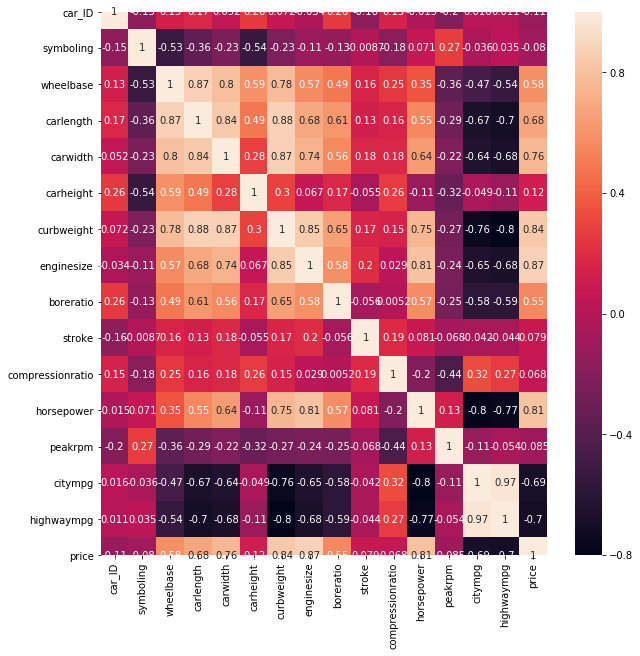

In [455]:
plt.figure(figsize = (10,10))  
sns.heatmap(data.corr(),annot=True)

In [456]:
data.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)
#we can also remove carID  as its just a serial number 
data.drop(['car_ID'], axis =1, inplace = True)

selecting numeric data

In [457]:
data_nos = data.select_dtypes(include=['float64', 'int64'])
data_nos.head()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,13495.0
1,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,16500.0
2,1,171.2,52.4,152,2.68,3.47,9.0,154,5000,19,16500.0
3,2,176.6,54.3,109,3.19,3.40,10.0,102,5500,24,13950.0
4,2,176.6,54.3,136,3.19,3.40,8.0,115,5500,18,17450.0


plotting scatter plots to check correlations and outliers

<Figure size 2160x1080 with 0 Axes>

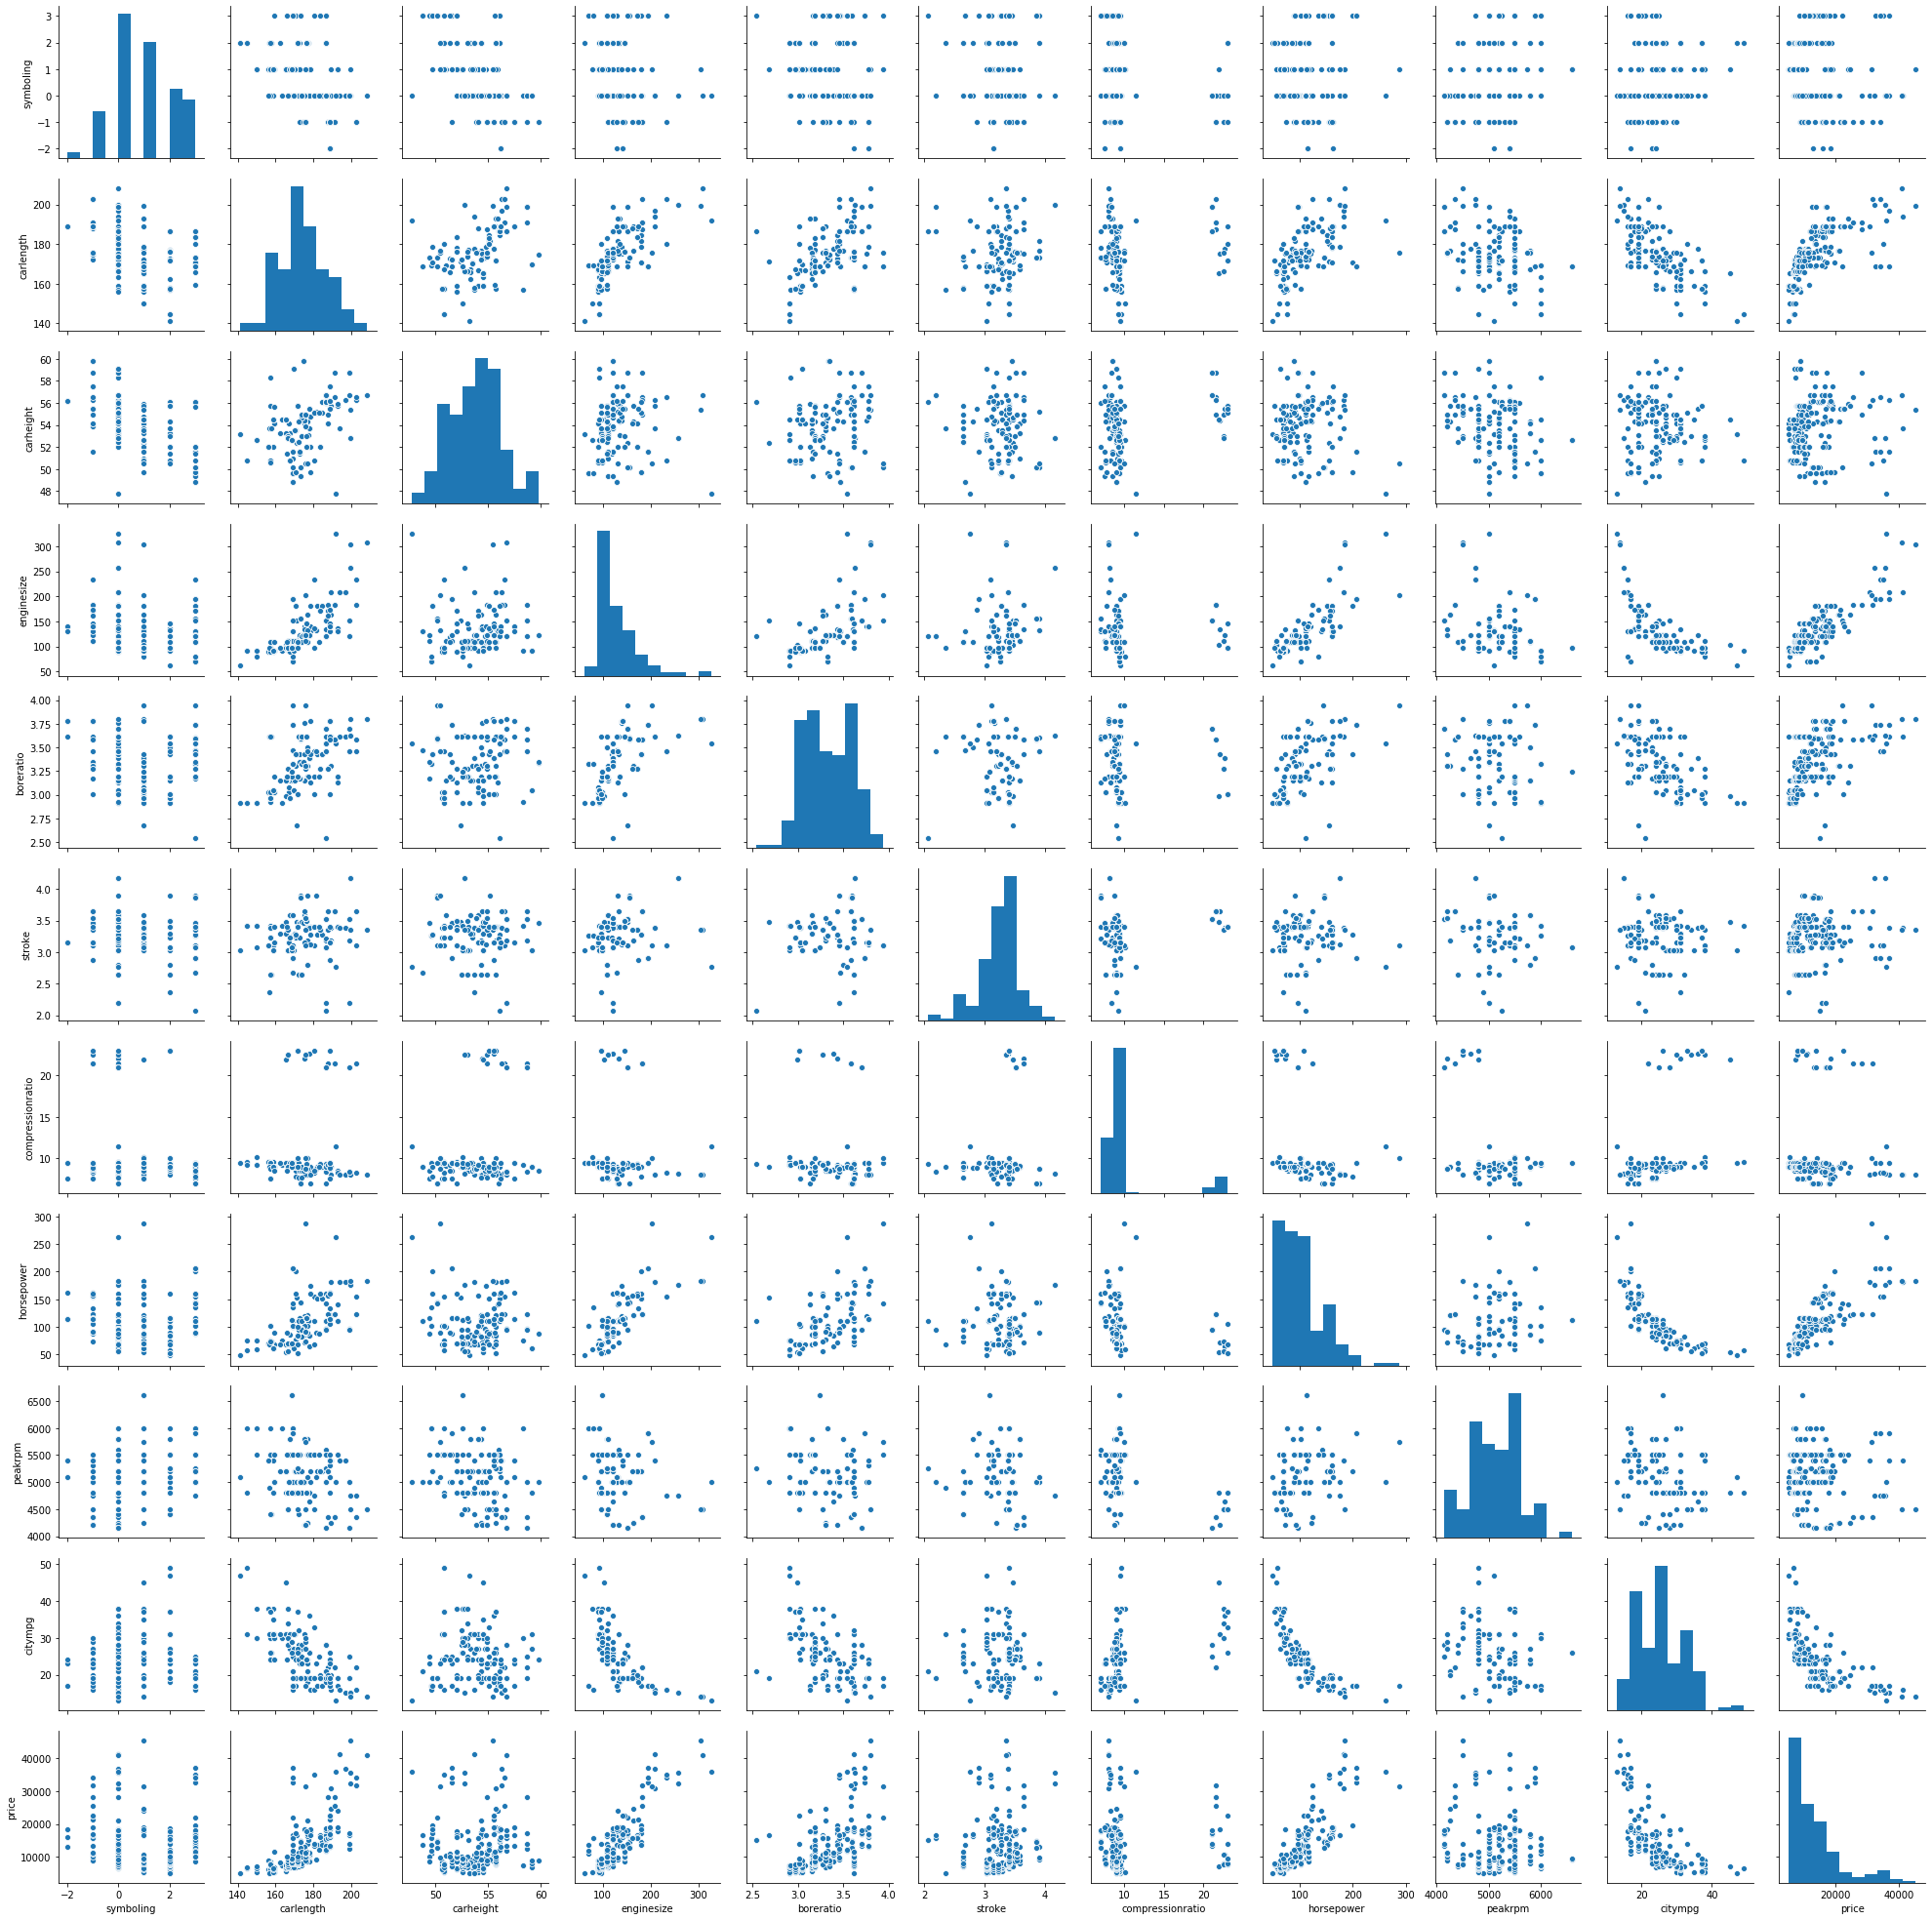

In [458]:
plt.figure(figsize=(30, 15))
sns.pairplot(data_nos)
plt.show()

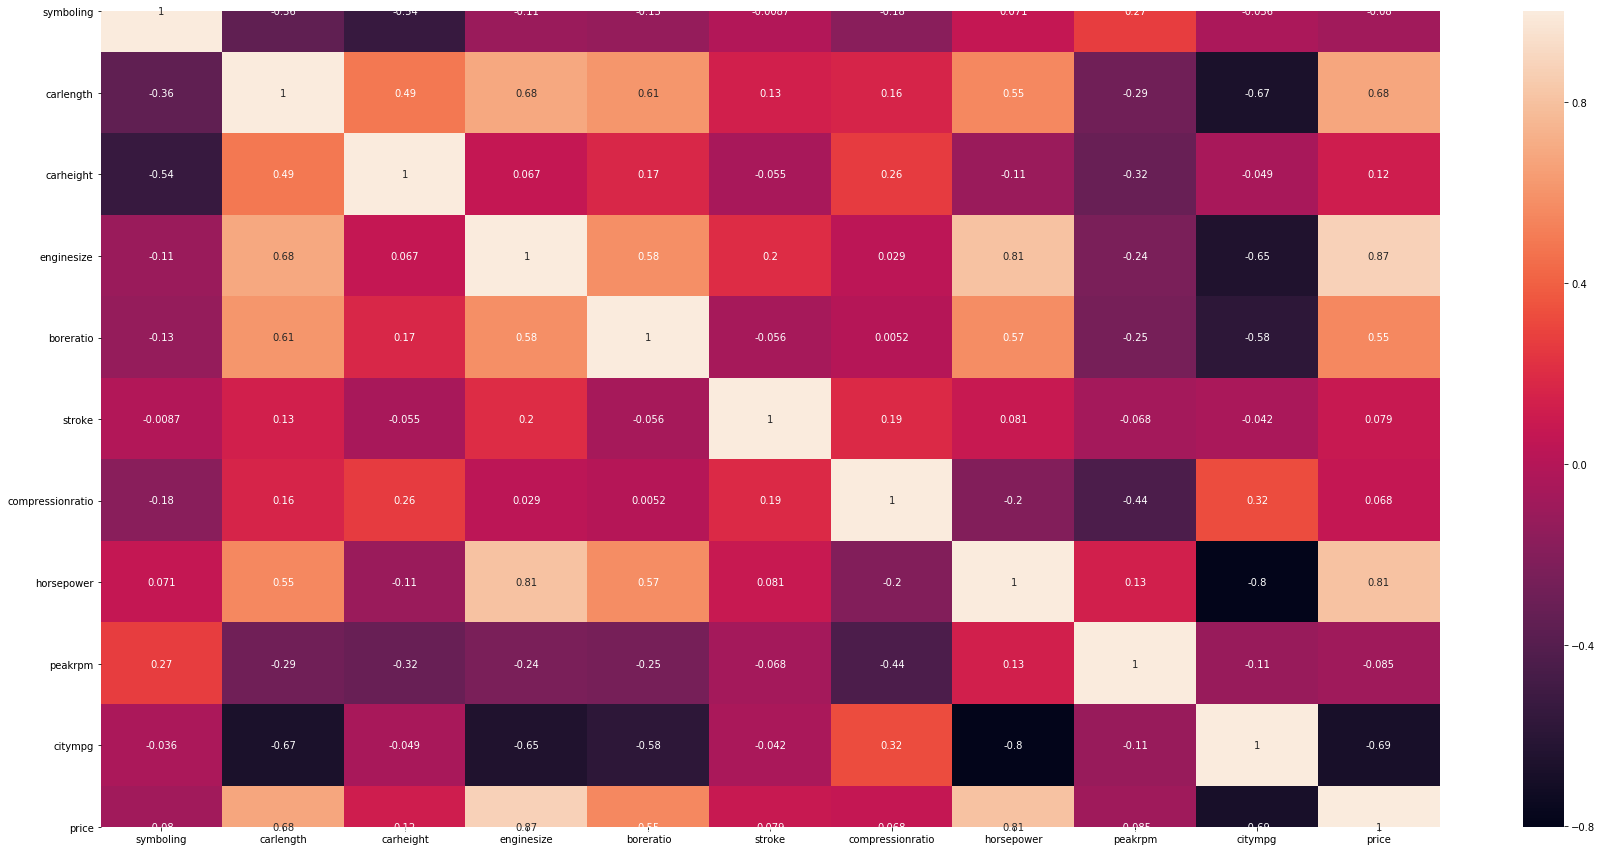

In [459]:
plt.figure(figsize = (30,15))  
sns.heatmap(data.corr(),annot = True)

In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(5), object(10)
memory usage:

In [461]:
data['company'] = data['CarName'].apply(lambda x: x.split(" ")[0])
data['company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company, Length: 205, dtype: object

In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
company             205 non-null object
dtypes: float6

In [463]:
data['company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company, Length: 205, dtype: object

In [464]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
company             205 non-null object
dtypes: float6

rechecking for misspelled data

In [465]:
data['company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: company, dtype: int64

In [466]:
data.company = data['company'].str.lower()
data['company'] = data['company'].str.replace('vw','volkswagen')
data['company'] = data['company'].str.replace('vokswagen','volkswagen')
data['company'] = data['company'].str.replace('toyouta','toyota')
data['company'] = data['company'].str.replace('porcshce','porsche')
data['company'] = data['company'].str.replace('maxda','mazda')
data['company'] = data['company'].str.replace('maxda','mazda')


In [467]:
data['company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: company, dtype: int64

## Now we need to condition the categorical variables and convert them into values

In [468]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,168.8,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,168.8,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,171.2,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,176.6,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,176.6,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi


In [469]:
# Drop carname variable
data = data.drop('CarName', axis=1)

In [470]:
data['carbody'].astype('category').value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [471]:
data['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [472]:
data['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [473]:
data['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [474]:
cat_var = data.select_dtypes(include=['object'])
cat_var.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [475]:
data = data.drop(list(cat_var.columns), axis=1)

In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
symboling           205 non-null int64
carlength           205 non-null float64
carheight           205 non-null float64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(5)
memory usage: 17.7 KB


In [477]:
data.head()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,13495.0
1,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,16500.0
2,1,171.2,52.4,152,2.68,3.47,9.0,154,5000,19,16500.0
3,2,176.6,54.3,109,3.19,3.40,10.0,102,5500,24,13950.0
4,2,176.6,54.3,136,3.19,3.40,8.0,115,5500,18,17450.0


In [478]:
data_dummies = pd.get_dummies(cat_var, drop_first=True)
data_dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [479]:
data = pd.concat([data, data_dummies], axis=1)

In [480]:
data.head()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,0,0,0,0,0,0,0
1,3,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,0,0,0,0,0,0,0
2,1,171.2,52.4,152,2.68,3.47,9.0,154,5000,19,...,0,0,0,0,0,0,0,0,0,0
3,2,176.6,54.3,109,3.19,3.40,10.0,102,5500,24,...,0,0,0,0,0,0,0,0,0,0
4,2,176.6,54.3,136,3.19,3.40,8.0,115,5500,18,...,0,0,0,0,0,0,0,0,0,0


# Model Building using linear regression:

In [481]:
data.columns

Index(['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'price', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_audi', 'company_bmw',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mi

### Making train and test data

In [482]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

## scaling

In [483]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
l1 = ['symboling','carlength', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'price']
df_train[l1] = scaler.fit_transform(df_train[l1])

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [484]:
df_train.head()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
122,0.170159,-0.487238,-1.134628,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-0.359789,-1.382026,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-0.375720,-0.392434,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-0.367754,-1.959288,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,1.225364,1.627983,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,...,0,0,0,0,0,0,0,0,0,1


## Creating a new model 

In [485]:
y_train = df_train.pop('price')
X_train = df_train

In [486]:

lm = LinearRegression()


lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### rfe and making uploading train and test sets

In [487]:

from sklearn.feature_selection import RFE


lin = LinearRegression()
r1 = RFE(lm, 15)


r1.fit(X_train, y_train)

print(r1.ranking_) 
print(r1.support_)           
 

[38 20 31  1  4  8 43 36 27 41 25  7 30 17 16 18 19 39 29 33  2  1 28  3
 42  1  1  1  1  1  1  1 21 23 24 44 22 37 46  1  1  1 15 35 14  9 40 10
 45 34 13  5 32  1 11  1 26 12  6  1]
[False False False  True False False False False False False False False
 False False False False False False False False False  True False False
 False  True  True  True  True  True  True  True False False False False
 False False False  True  True  True False False False False False False
 False False False False False  True False  True False False False  True]


## Feature Selection

In [488]:

import statsmodels.api as sm  



In [489]:

c1 = X_train.columns[r1.support_]
X_train_r1 = X_train[c1]

Adding constant

In [490]:

X_train_r1 = sm.add_constant(X_train_r1)
X_train_r1.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,enginesize,enginetype_l,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,company_audi,company_bmw,company_buick,company_porsche,company_saab,company_volvo
122,1.0,-0.660242,0,0,0,1,0,0,0,0,0,0,0,0,0,0
125,1.0,0.637806,0,0,0,1,0,0,0,0,0,0,0,1,0,0
166,1.0,-0.660242,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1.0,0.123485,0,0,0,1,0,0,0,0,0,0,0,0,0,0
199,1.0,0.123485,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Evaluation

In [491]:
lin_mod2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lin_mod2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              86.21
Date:                Mon, 09 Mar 2020   Prob (F-statistic):                    1.10e-54
Time:                        21:58:29   Log-Likelihood:                         -52.598
No. Observations:                 143   AIC:                                      127.2
Df Residuals:                     132   BIC:                                      159.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### checking for vif of features 

In [492]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_r1.columns
vif['VIF'] = [variance_inflation_factor(X_train_r1.values, i) for i in range(X_train_r1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
3,enginetype_rotor,inf
9,cylindernumber_two,inf
0,const,128.65
5,cylindernumber_four,26.24
6,cylindernumber_six,14.23
4,cylindernumber_five,5.72
1,enginesize,5.39
10,company_audi,4.35
12,company_buick,4.17
7,cylindernumber_three,2.45


we need to remove variables with inf vif


creating a new model hence

In [493]:

from sklearn.feature_selection import RFE
#fitting with 10 features

lin_mod3 = LinearRegression()
r2 = RFE(lin_mod3 , 10)


r2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [494]:
# feature selection
c2 = X_train.columns[r2.support_]

# Subsetting training data
X_train_r2 = X_train[c2]

# Add a constant 
X_train_r2 = sm.add_constant(X_train_r2)

# Fitting  10 variables
lin_mod3 = sm.OLS(y_train, X_train_r2).fit()   
print(lin_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.78e-63
Time:                        21:58:29   Log-Likelihood:                -34.646
No. Observations:                 143   AIC:                             89.29
Df Residuals:                     133   BIC:                             118.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [509]:
##features selection using VIF

In [495]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_r2.columns
vif['VIF'] = [variance_inflation_factor(X_train_r2.values, i) for i in range(X_train_r2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,enginetype_rotor,inf
4,cylindernumber_two,inf
1,enginesize,1.94
0,const,1.39
3,cylindernumber_twelve,1.36
7,company_buick,1.31
6,company_bmw,1.15
8,company_porsche,1.11
10,company_volvo,1.05
5,company_audi,1.02


## Evaluation of the optimized model

#### Dropping more variables is reducing the r squared and adjacent r squared value 

In [496]:

X_train_r2 = sm.add_constant(X_train_r2)


lin_mod3 = sm.OLS(y_train, X_train_r2).fit()   
print(lin_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.78e-63
Time:                        21:58:30   Log-Likelihood:                -34.646
No. Observations:                 143   AIC:                             89.29
Df Residuals:                     133   BIC:                             118.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

### Residual analysis:


In [507]:
ytp = lin_mod3.predict(X_train_r2)

### Plotting histograms

Text(0.5, 0, 'Errors')

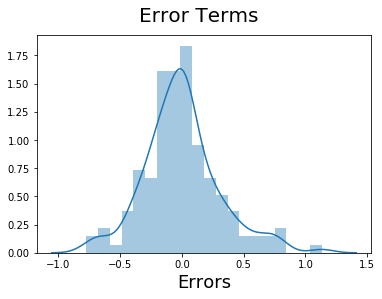

In [508]:

fig = plt.figure()
sns.distplot((y_train - ytp), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)         

In [499]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [500]:
y_test = df_test.pop('price')
X_test = df_test

In [501]:
c2

Index(['enginesize', 'enginetype_rotor', 'cylindernumber_twelve',
       'cylindernumber_two', 'company_audi', 'company_bmw', 'company_buick',
       'company_porsche', 'company_saab', 'company_volvo'],
      dtype='object')

In [502]:
X_test_r2 = X_test[c2]

In [503]:
X_test_r2 = sm.add_constant(X_test_r2)
X_test_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 11 columns):
const                    62 non-null float64
enginesize               62 non-null float64
enginetype_rotor         62 non-null uint8
cylindernumber_twelve    62 non-null uint8
cylindernumber_two       62 non-null uint8
company_audi             62 non-null uint8
company_bmw              62 non-null uint8
company_buick            62 non-null uint8
company_porsche          62 non-null uint8
company_saab             62 non-null uint8
company_volvo            62 non-null uint8
dtypes: float64(2), uint8(9)
memory usage: 2.0 KB


C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [504]:
yp = lin_mod3.predict(X_test_r2)

## R^2 score

In [505]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_test, yp)

0.9015617915817837

## final predictions

Text(0, 0.5, 'yprediction')

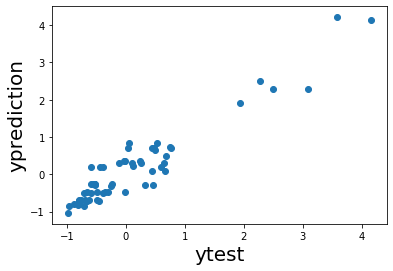

In [506]:
fig = plt.figure()
plt.scatter(y_test, yp)
            
plt.xlabel('ytest', fontsize = 20)                          # X-label
plt.ylabel('yprediction', fontsize = 20)  

## summary

## R squared value is 0.905  and  Adj. R-squared:0.899